# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  
Coach price max: 593.635.
Coach price min: 44.415.
Coach price

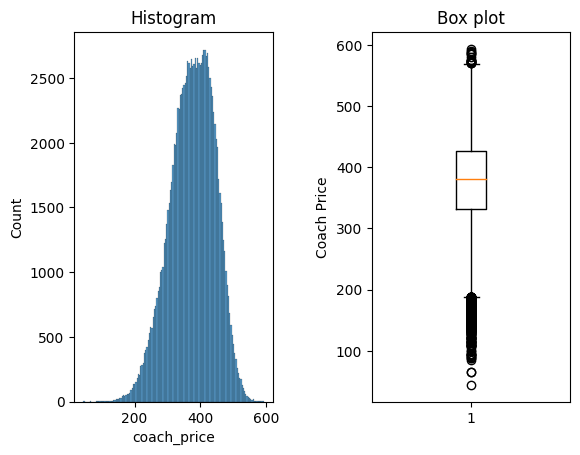

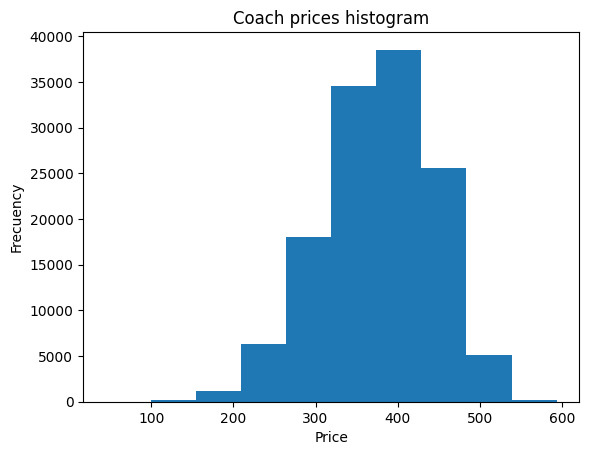

<Figure size 640x480 with 0 Axes>

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
print(flight.head())

## Task 1
print("Coach price max: {}.".format(flight.coach_price.max()))
print("Coach price min: {}.".format(flight.coach_price.min()))
print("Coach price mean: {}.".format(flight.coach_price.mean()))
print("Coach price median: {}.".format(np.median(flight.coach_price)))

plt.subplot(1, 2, 1)
sns.histplot(flight.coach_price)
plt.title("Histogram")

plt.subplot(1, 2, 2)
plt.boxplot(flight.coach_price) #Muestra que el promedio está en 376.58, dato similar a la media 380.56
plt.title("Box plot")
plt.ylabel("Coach Price")

plt.subplots_adjust(wspace=0.5)
plt.show()
plt.clf()

#Opción alternativa para el histograma
plt.hist(flight.coach_price, bins=10) #Aumentar el número de bins nos permite realizar una mayor segmentación de los precios.
plt.title("Coach prices histogram")
plt.xlabel("Price")
plt.ylabel("Frecuency")
plt.show()
plt.clf()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

Max of flights with a duration of 8 hours: 593.635.
Min of flights with a duration of 8 hours: 170.77.
Mean of flights with a duration of 8 hours: 431.834377372817.
Median of flights with a duration of 8 hours: 437.115.


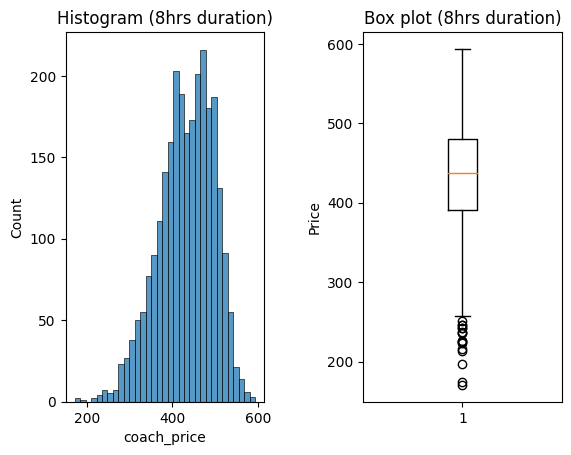

<Figure size 640x480 with 0 Axes>

In [25]:
## Task 2
eight_hours_long = flight[flight.hours == 8].reset_index(drop=True) #Se filtran los datos a utilizar en la tarea 2.
#Es muy importante resetear el índice, ya que lo que se hace es crear un nuevo df con el cual trabajar.

print("Max of flights with a duration of 8 hours: {}.".format(eight_hours_long.coach_price.max()))
print("Min of flights with a duration of 8 hours: {}.".format(eight_hours_long.coach_price.min()))
print("Mean of flights with a duration of 8 hours: {}.".format(eight_hours_long.coach_price.mean()))
print("Median of flights with a duration of 8 hours: {}.".format(np.median(eight_hours_long.coach_price)))

plt.subplot(1, 2, 1)
sns.histplot(eight_hours_long.coach_price)
plt.title("Histogram (8hrs duration)")

plt.subplot(1, 2, 2)
plt.boxplot(eight_hours_long.coach_price)
plt.title("Box plot (8hrs duration)")
plt.ylabel("Price")

plt.subplots_adjust(wspace=0.5)
plt.show()
plt.clf()

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

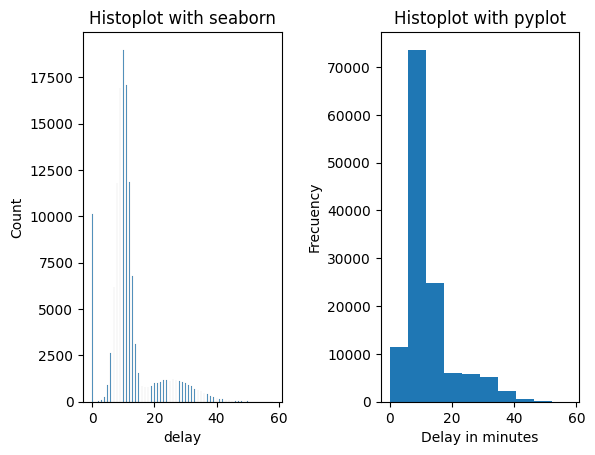

<Figure size 640x480 with 0 Axes>

In [26]:
## Task 3
plt.subplot(1, 2, 1)
sns.histplot(flight.delay[flight.delay <=500])
plt.title("Histoplot with seaborn")

plt.subplot(1, 2, 2)
plt.hist(flight.delay[flight.delay <=500], bins=10)
plt.title("Histoplot with pyplot")
plt.ylabel("Frecuency")
plt.xlabel("Delay in minutes")

plt.subplots_adjust(wspace=0.5)
plt.show()
plt.clf()

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

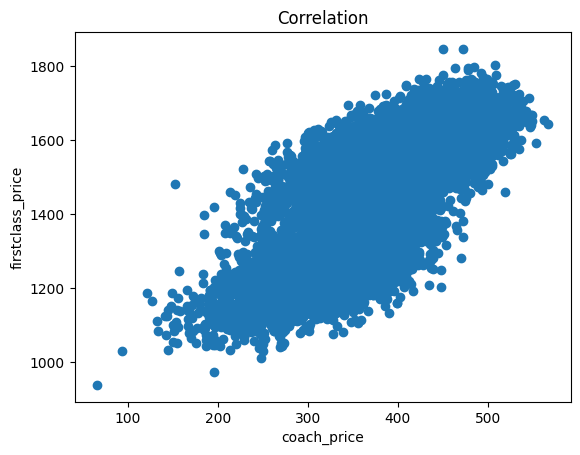

<Figure size 640x480 with 0 Axes>

In [29]:
## Task 4
perc = 0.1 #Este código nos permite crear un subset con una muestra de los datos.
flight_sub = flight.sample(n = int(flight.shape[0]*perc)) #Solo es necesario cambiar la fuente de los datos en los scatter plots.

plt.scatter(flight_sub.coach_price, flight_sub.firstclass_price)
plt.title("Correlation")
plt.xlabel("coach_price")
plt.ylabel("firstclass_price")

plt.show()
plt.clf()

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

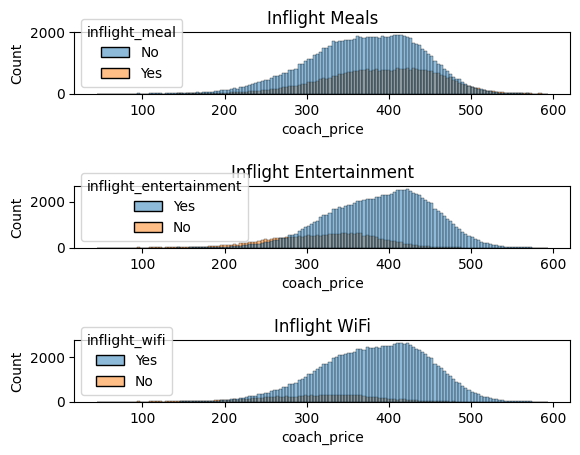

<Figure size 640x480 with 0 Axes>

In [21]:
## Task 5
plt.subplot(3, 1, 1)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.title("Inflight Meals")

plt.subplot(3, 1, 2)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.title("Inflight Entertainment")

plt.subplot(3, 1, 3)
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.title("Inflight WiFi")

plt.subplots_adjust(wspace=0.75, hspace=1.5)
plt.show()
plt.clf()

#Esta es una opción para unificar las gráficas, sin embargo, lo ideal es que cada gráfica se muestre por separado, con la finalidad de observar más datos en el eje y.

6. How does the number of passengers change in relation to the length of flights?

c:\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


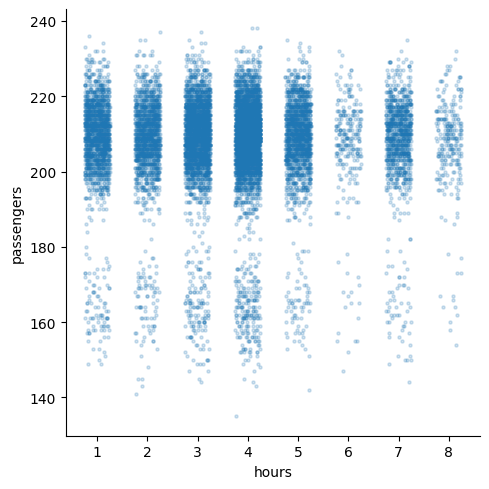

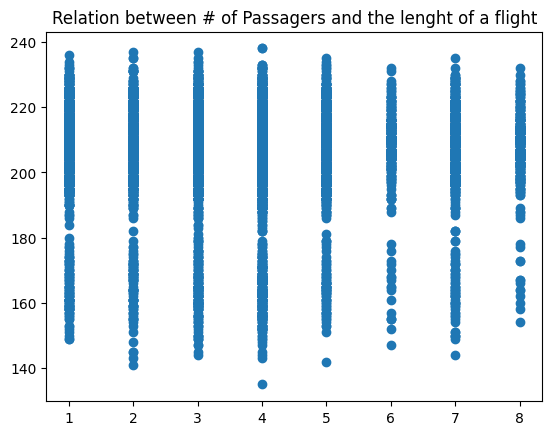

<Figure size 640x480 with 0 Axes>

In [22]:
## Task 6
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.show()
plt.clf()
plt.title("Relation between # of Passagers and the lenght of a flight")

plt.scatter(flight_sub.hours, flight_sub.passengers)
plt.title("Relation between # of Passagers and the lenght of a flight")
plt.show()
plt.clf() #Este gráfico muestra menor detalle.


## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

c:\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


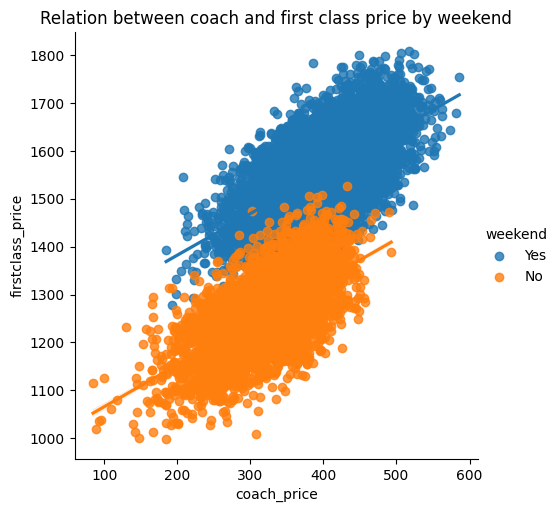

<Figure size 640x480 with 0 Axes>

In [23]:
## Task 7
sns.lmplot(x="coach_price", y="firstclass_price", data=flight_sub, hue="weekend")
plt.title("Relation between coach and first class price by weekend")
plt.show()
plt.clf()

#Al gráfico anterior se le puede agregar la keyword: fit_reg= False; lo cual invertirá los colores.

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

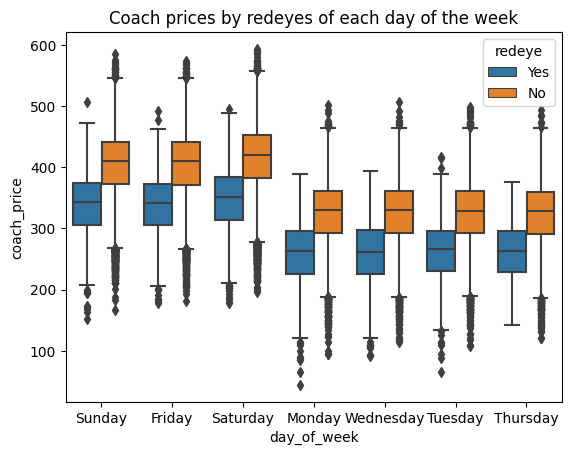

<Figure size 640x480 with 0 Axes>

In [24]:
## Task 8
sns.boxplot(x="day_of_week", y="coach_price", data=flight, hue="redeye")
plt.title("Coach prices by redeyes of each day of the week")
plt.show()
plt.clf()